# Data Analysis

Ce notebook a pour but de visualiser et décrire les données fournies.

In [27]:
# Importations

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

## Station C

Cette section touche à toutes les données de la station C.

### Données météo

Il s'agit de tous les relevés météo des communes alentours à la station C. Elles se situent dans le répertoire suivant : `Dataset/bronze/weather_C`.

Après une recherche internet, les données proviennent sûrement de : `https://open-meteo.com/en/docs`.

Voici ci-dessous la signification de chacune des metadatas. 

| Variable | Temps de validité | Unité | Description |
| :--- | :--- | :--- | :--- |
| `temperature_2m` | Instantané | °C | Air temperature at 2 meters above ground. |
| `relative_humidity_2m` | Instantané | % | Relative humidity at 2 meters above ground. |
| `dew_point_2m` | Instantané | °C | Température à laquelle l'air doit être refroidi pour que la vapeur d'eau se condense en rosée. |
| `wind_speed_10m` | Instantané | km/h | Wind speed at 10 meters above ground. |
| `wind_direction_10m` | Instantané | ° | Wind directions at 10 meters above the ground. |
| `wind_gusts_10m` | Max (heure préc.) | km/h | Gusts at 10 meters above ground as a maximum of the preceding hour. |
| `rain` | Somme (heure préc.) | mm | Rain from large scale weather systems of the preceding hour. |
| `weather_code` | Instantané | WMO | Weather condition as a numeric code. |

#### Chargement des données

On charge les données sous formes de Dataframe pandas. 

In [ ]:
Nearby_cities_C = ['Aiglemont', 'Chalandry-Elaire', 'Damouzy', 'Dom-le-Mesnil', 'Flize', 'La-Francheville', 'La-Grandville', 'Les-Ayvelles', 'Montcy-Notre-Dame', 'Prix-les-Mezieres', 'Saint-Laurent', 'Ville-sur-Lumes', 'Villers-Semeuse', 'Warcq']
metadata_C = ['date', 'temperature_2m', 'relative_humidity_2m', 'dew_point_2m', 'rain', 'weather_code', 'wind_speed_10m', 'wind_speed_100m', 'wind_direction_10m', 'wind_direction_100m', 'wind_gusts_10m', 'latitude', 'longitude', 'city']
Dataframes_C = {}
for city in Nearby_cities_C:
    Dataframes_C[city] = pd.read_csv(f'../Dataset/bronze/weather_C/{city}_hourly.csv')
    Dataframes_C[city]['date'] = pd.to_datetime(Dataframes_C[city]['date'])

# Affichage test
display(Dataframes_C['Aiglemont'].head())
display(Dataframes_C['Aiglemont'].tail())

,date,temperature_2m,relative_humidity_2m,dew_point_2m,rain,weather_code,wind_speed_10m,wind_speed_100m,wind_direction_10m,wind_direction_100m,wind_gusts_10m,latitude,longitude,city
0,2015-01-01 00:00:00,0.7005,97.15248,0.3005,0.0,3.0,3.396233,8.854829,237.99466,243.43501,8.64,49.79022,4.770087,Aiglemont
1,2015-01-01 01:00:00,-0.9995,98.18678,-1.2495,0.0,3.0,1.440000,6.489992,180.00000,236.30990,8.28,49.79022,4.770087,Aiglemont
2,2015-01-01 02:00:00,-2.0995,98.89860,-2.2495,0.0,3.0,2.880000,6.489992,180.00000,213.69010,7.92,49.79022,4.770087,Aiglemont
3,2015-01-01 03:00:00,-2.3495,100.00000,-2.3495,0.0,3.0,4.452954,8.825508,165.96373,191.76826,8.28,49.79022,4.770087,Aiglemont
4,2015-01-01 04:00:00,-3.3995,100.00000,-3.3995,0.0,3.0,6.924738,11.885453,171.02745,181.73567,9.36,49.79022,4.770087,Aiglemont


,date,temperature_2m,relative_humidity_2m,dew_point_2m,rain,weather_code,wind_speed_10m,wind_speed_100m,wind_direction_10m,wind_direction_100m,wind_gusts_10m,latitude,longitude,city
87667,2024-12-31 19:00:00,-0.1345,100.00000,-0.1345,0.0,3.0,15.710607,29.481010,198.01987,204.53079,29.519999,49.79022,4.770087,Aiglemont
87668,2024-12-31 20:00:00,0.3155,99.63892,0.2655,0.0,3.0,15.086748,28.982235,199.51596,207.36069,29.160000,49.79022,4.770087,Aiglemont
87669,2024-12-31 21:00:00,0.7155,100.00000,0.7155,0.0,3.0,15.717823,30.141266,203.62940,209.32037,30.239998,49.79022,4.770087,Aiglemont
87670,2024-12-31 22:00:00,1.0655,100.00000,1.0655,0.0,3.0,17.307167,31.673860,206.56499,211.52213,32.760002,49.79022,4.770087,Aiglemont
87671,2024-12-31 23:00:00,1.4655,99.64231,1.4155,0.0,3.0,18.434847,33.092598,206.06460,210.74990,36.360000,49.79022,4.770087,Aiglemont


#### Situation géographique
On trace les villes sur une carte pour avoir leur position relative. On fait dans le but de détecter (ou non) une certaine corrélation avec les autres données. Notamment une corrélation entre position géographique et température. 

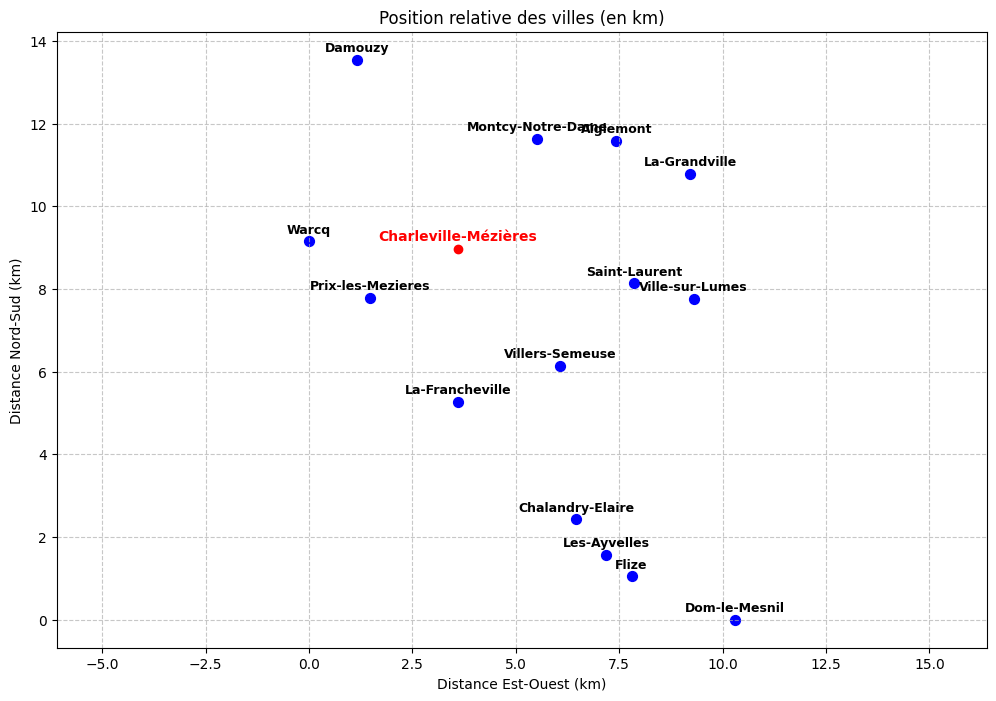

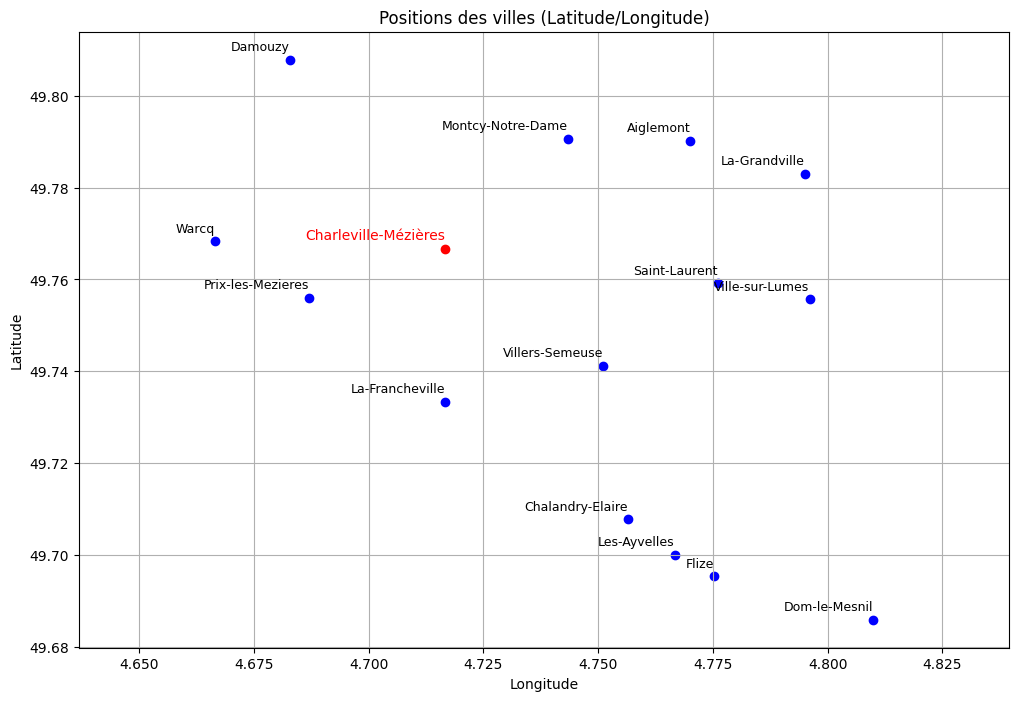

In [3]:
Position_Charleville = (49.76667, 4.71667)  # Latitude, Longitude

Position_cities = [(df['latitude'].iloc[0], df['longitude'].iloc[0]) for city, df in Dataframes_C.items()]
lats_tuple, lons_tuple = zip(*Position_cities)

lat0 = np.array(min(lats_tuple))
lon0 = np.array(min(lons_tuple))

# Conversion en kilomètres (approximation)
lat_avg = np.radians(np.mean(lats_tuple))
x_km = (np.array(lons_tuple) - lon0) * 111 * np.cos(lat_avg)
y_km = (np.array(lats_tuple) - lat0) * 111

plt.figure(figsize=(12, 8))
plt.scatter(x_km, y_km, color='blue', s=50)

for i, city in enumerate(Nearby_cities_C):
    plt.text(x_km[i], y_km[i] + 0.2, city, fontsize=9, ha='center', fontweight='bold')

plt.scatter((Position_Charleville[1] - lon0) * 111 * np.cos(lat_avg), (Position_Charleville[0] - lat0) * 111, color='red')
plt.text((Position_Charleville[1] - lon0) * 111 * np.cos(lat_avg), (Position_Charleville[0] - lat0) * 111 + 0.2, 'Charleville-Mézières', fontsize=10, ha='center', fontweight='bold', color='red')

plt.title('Position relative des villes (en km)')
plt.xlabel('Distance Est-Ouest (km)')
plt.ylabel('Distance Nord-Sud (km)')
plt.axis('equal')
plt.grid(linestyle='--', alpha=0.7)
plt.show()


plt.figure(figsize=(12, 8))
plt.scatter(lons_tuple, lats_tuple, color='blue')
for i, city in enumerate(Nearby_cities_C):
    plt.text(lons_tuple[i], lats_tuple[i] + 0.002, city, fontsize=9, ha='right')

plt.scatter(Position_Charleville[1], Position_Charleville[0], color='red')
plt.text(Position_Charleville[1], Position_Charleville[0] + 0.002, 'Charleville-Mézières', fontsize=10, ha='right', color='red')
plt.title('Positions des villes (Latitude/Longitude)')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.axis('equal')
plt.grid()
plt.show()

#### Statistiques basiques
Pour avoir une petite idée des données qu'on manipule, on utilise la fonction describe() de pandas.

In [4]:
for city, df in Dataframes_C.items():
    print(f"{city} :")
    display(df.drop(columns=['date', 'latitude', 'longitude']).describe())

Aiglemont :


,temperature_2m,relative_humidity_2m,dew_point_2m,rain,weather_code,wind_speed_10m,wind_speed_100m,wind_direction_10m,wind_direction_100m,wind_gusts_10m
count,87672.000000,87672.000000,87672.000000,87672.000000,87672.000000,87672.000000,87672.000000,87672.000000,87672.000000,87672.000000
mean,10.471574,79.504180,6.654667,0.123575,14.352074,12.569521,21.447389,175.055421,181.916736,26.647284
std,7.104581,16.124520,5.773780,0.412164,22.418746,6.325545,9.982316,97.297339,95.565753,13.031207
min,-11.749500,15.629698,-20.234499,0.000000,0.000000,0.000000,0.000000,0.881386,0.381963,1.440000
25%,5.165500,68.851713,2.665500,0.000000,1.000000,7.704336,14.205182,94.763560,107.878790,16.919998
50%,10.015500,84.194725,6.915500,0.000000,3.000000,11.609651,20.724247,188.530690,197.354110,24.840000
75%,15.565499,92.682106,11.015500,0.000000,3.000000,16.279802,27.534704,247.067870,251.564960,34.200000
max,37.415500,100.000000,22.750500,15.700000,75.000000,49.367275,74.606900,360.000000,360.000000,116.279990


Chalandry-Elaire :


,temperature_2m,relative_humidity_2m,dew_point_2m,rain,weather_code,wind_speed_10m,wind_speed_100m,wind_direction_10m,wind_direction_100m,wind_gusts_10m
count,87672.000000,87672.000000,87672.000000,87672.000000,87672.000000,87672.000000,87672.000000,87672.000000,87672.000000,87672.000000
mean,11.008158,79.233211,7.127943,0.111852,13.146717,13.310411,22.260517,179.016299,182.682257,26.564482
std,7.140197,15.951054,5.766394,0.408704,21.581615,6.858612,10.474259,97.148715,95.981166,13.250762
min,-11.540000,14.662851,-19.785500,0.000000,0.000000,0.000000,0.000000,0.881386,0.454718,1.080000
25%,5.714500,68.867035,3.164500,0.000000,1.000000,8.049845,14.799459,98.530685,104.743614,16.560000
50%,10.564501,83.856250,7.364500,0.000000,3.000000,12.074766,21.388970,195.461270,200.082060,24.480000
75%,16.114500,92.217301,11.464500,0.000000,3.000000,17.287498,28.357857,249.936960,252.654660,34.200000
max,37.914500,100.000000,23.610000,20.500000,75.000000,57.004044,84.185360,360.000000,360.000000,114.479996


Damouzy :


,temperature_2m,relative_humidity_2m,dew_point_2m,rain,weather_code,wind_speed_10m,wind_speed_100m,wind_direction_10m,wind_direction_100m,wind_gusts_10m
count,87672.000000,87672.000000,87672.000000,87672.000000,87672.000000,87672.000000,87672.000000,87672.000000,87672.000000,87672.000000
mean,10.536590,79.686692,6.758146,0.114290,13.601412,12.786239,21.729075,178.772090,182.915622,26.506256
std,7.109659,15.960045,5.761366,0.396692,21.893214,6.576404,10.142666,99.010169,96.432531,13.185965
min,-12.134500,14.700857,-20.071500,0.000000,0.000000,0.000000,0.000000,0.881386,0.454718,2.160000
25%,5.228500,69.364668,2.778500,0.000000,1.000000,7.704336,14.480773,98.365800,108.435040,16.560000
50%,10.078500,84.386763,7.015500,0.000000,3.000000,11.620809,20.929596,194.036270,198.641890,24.480000
75%,15.628500,92.604080,11.078500,0.000000,3.000000,16.595179,27.748037,251.564960,253.370152,33.839996
max,37.528500,100.000000,25.578499,17.700000,75.000000,51.782467,79.560000,360.000000,360.000000,118.440000


Dom-le-Mesnil :


,temperature_2m,relative_humidity_2m,dew_point_2m,rain,weather_code,wind_speed_10m,wind_speed_100m,wind_direction_10m,wind_direction_100m,wind_gusts_10m
count,87672.000000,87672.000000,87672.000000,87672.000000,87672.000000,87672.000000,87672.000000,87672.000000,87672.000000,87672.000000
mean,11.000065,79.151737,7.101236,0.111968,13.244844,13.507115,22.511318,181.422529,183.933190,26.819162
std,7.166195,16.013707,5.790888,0.392439,21.677482,6.915522,10.581175,95.807710,95.265471,13.212848
min,-11.605000,14.462380,-20.129000,0.000000,0.000000,0.000000,0.000000,0.698679,0.454718,1.080000
25%,5.671000,68.784960,3.121000,0.000000,1.000000,8.225035,14.986553,102.804260,105.255170,16.919998
50%,10.571000,83.708040,7.371000,0.000000,3.000000,12.287555,21.611996,197.281590,201.484480,24.840000
75%,16.121000,92.189491,11.471000,0.000000,3.000000,17.462784,28.739187,251.861820,253.708153,34.200000
max,38.021000,100.000000,23.545000,13.100000,75.000000,56.884556,84.388330,360.000000,360.000000,110.880000


Flize :


,temperature_2m,relative_humidity_2m,dew_point_2m,rain,weather_code,wind_speed_10m,wind_speed_100m,wind_direction_10m,wind_direction_100m,wind_gusts_10m
count,87672.000000,87672.000000,87672.000000,87672.000000,87672.000000,87672.000000,87672.000000,87672.000000,87672.000000,87672.000000
mean,11.208065,79.179217,7.309236,0.110767,13.026759,13.500535,22.456619,181.869607,184.250509,26.543737
std,7.166195,15.996834,5.790888,0.391816,21.504506,6.910941,10.580886,96.054880,95.504594,13.074479
min,-11.397000,14.506582,-19.921000,0.000000,0.000000,0.000000,0.000000,0.698679,0.530492,1.080000
25%,5.879000,68.826830,3.329000,0.000000,1.000000,8.225035,14.917212,102.528800,104.743614,16.560000
50%,10.779000,83.732870,7.579000,0.000000,3.000000,12.287555,21.599998,197.410425,201.614840,24.480000
75%,16.329000,92.202024,11.679000,0.000000,3.000000,17.447933,28.691795,253.120225,254.623690,33.839996
max,38.229000,100.000000,23.753000,13.100000,75.000000,56.884556,84.388330,360.000000,360.000000,110.880000


La-Francheville :


,temperature_2m,relative_humidity_2m,dew_point_2m,rain,weather_code,wind_speed_10m,wind_speed_100m,wind_direction_10m,wind_direction_100m,wind_gusts_10m
count,87672.000000,87672.000000,87672.000000,87672.000000,87672.000000,87672.000000,87672.000000,87672.000000,87672.000000,87672.000000
mean,11.071379,79.204255,7.183905,0.111852,13.146717,13.310411,22.260517,179.016299,182.682257,26.564482
std,7.134264,15.949723,5.760074,0.408704,21.581615,6.858612,10.474259,97.148715,95.981166,13.250762
min,-9.477000,14.675355,-19.727000,0.000000,0.000000,0.000000,0.000000,0.881386,0.454718,1.080000
25%,5.773000,68.844730,3.223000,0.000000,1.000000,8.049845,14.799459,98.530685,104.743614,16.560000
50%,10.623000,83.821085,7.423000,0.000000,3.000000,12.074766,21.388970,195.461270,200.082060,24.480000
75%,16.173000,92.198494,11.523000,0.000000,3.000000,17.287498,28.357857,249.936960,252.654660,34.200000
max,37.973000,100.000000,22.949000,20.500000,75.000000,57.004044,84.185360,360.000000,360.000000,114.479996


La-Grandville :


,temperature_2m,relative_humidity_2m,dew_point_2m,rain,weather_code,wind_speed_10m,wind_speed_100m,wind_direction_10m,wind_direction_100m,wind_gusts_10m
count,87672.000000,87672.000000,87672.000000,87672.000000,87672.000000,87672.000000,87672.000000,87672.000000,87672.000000,87672.000000
mean,10.653574,79.527865,6.836667,0.123575,14.352074,12.569521,21.447389,175.055421,181.916736,26.647284
std,7.104581,16.109472,5.773780,0.412164,22.418746,6.325545,9.982316,97.297339,95.565753,13.031207
min,-11.567500,15.669869,-20.052500,0.000000,0.000000,0.000000,0.000000,0.881386,0.381963,1.440000
25%,5.347500,68.889343,2.847500,0.000000,1.000000,7.704336,14.205182,94.763560,107.878790,16.919998
50%,10.197500,84.215570,7.097500,0.000000,3.000000,11.609651,20.724247,188.530690,197.354110,24.840000
75%,15.747499,92.692635,11.197500,0.000000,3.000000,16.279802,27.534704,247.067870,251.564960,34.200000
max,37.597500,100.000000,22.932499,15.700000,75.000000,49.367275,74.606900,360.000000,360.000000,116.279990


Les-Ayvelles :


,temperature_2m,relative_humidity_2m,dew_point_2m,rain,weather_code,wind_speed_10m,wind_speed_100m,wind_direction_10m,wind_direction_100m,wind_gusts_10m
count,87672.000000,87672.000000,87672.000000,87672.000000,87672.000000,87672.000000,87672.000000,87672.000000,87672.000000,87672.000000
mean,11.110565,79.166343,7.211736,0.111968,13.244844,13.507115,22.511318,181.422529,183.933190,26.819162
std,7.166195,16.004740,5.790888,0.392439,21.677482,6.915522,10.581175,95.807710,95.265471,13.212848
min,-11.494500,14.485855,-20.018501,0.000000,0.000000,0.000000,0.000000,0.698679,0.454718,1.080000
25%,5.781500,68.807220,3.231500,0.000000,1.000000,8.225035,14.986553,102.804260,105.255170,16.919998
50%,10.681500,83.721240,7.481500,0.000000,3.000000,12.287555,21.611996,197.281590,201.484480,24.840000
75%,16.231499,92.196154,11.581500,0.000000,3.000000,17.462784,28.739187,251.861820,253.708153,34.200000
max,38.131500,100.000000,23.655500,13.100000,75.000000,56.884556,84.388330,360.000000,360.000000,110.880000


Montcy-Notre-Dame :


,temperature_2m,relative_humidity_2m,dew_point_2m,rain,weather_code,wind_speed_10m,wind_speed_100m,wind_direction_10m,wind_direction_100m,wind_gusts_10m
count,87672.000000,87672.000000,87672.000000,87672.000000,87672.000000,87672.000000,87672.000000,87672.000000,87672.000000,87672.000000
mean,10.939590,79.738731,7.161146,0.114290,13.601412,12.786239,21.729075,178.772090,182.915622,26.506256
std,7.109659,15.927131,5.761366,0.396692,21.893214,6.576404,10.142666,99.010169,96.432531,13.185965
min,-11.731501,14.787309,-19.668500,0.000000,0.000000,0.000000,0.000000,0.881386,0.454718,2.160000
25%,5.631500,69.445179,3.181500,0.000000,1.000000,7.704336,14.480773,98.365800,108.435040,16.560000
50%,10.481500,84.431550,7.418500,0.000000,3.000000,11.620809,20.929596,194.036270,198.641890,24.480000
75%,16.031500,92.627304,11.481500,0.000000,3.000000,16.595179,27.748037,251.564960,253.370152,33.839996
max,37.931500,100.000000,25.981499,17.700000,75.000000,51.782467,79.560000,360.000000,360.000000,118.440000


Prix-les-Mezieres :


,temperature_2m,relative_humidity_2m,dew_point_2m,rain,weather_code,wind_speed_10m,wind_speed_100m,wind_direction_10m,wind_direction_100m,wind_gusts_10m
count,87672.000000,87672.000000,87672.000000,87672.000000,87672.000000,87672.000000,87672.000000,87672.000000,87672.000000,87672.000000
mean,11.209993,79.386395,7.357142,0.110651,12.928632,13.303831,22.205818,179.463378,182.999576,26.289058
std,7.125239,15.888136,5.765770,0.408105,21.406864,6.853804,10.472657,97.403526,96.222635,13.107443
min,-11.491000,14.707329,-19.577500,0.000000,0.000000,0.000000,0.000000,0.806910,0.530492,1.080000
25%,5.922500,69.115295,3.372500,0.000000,1.000000,8.049845,14.764390,98.355742,104.237320,16.199999
50%,10.772500,83.980375,7.615750,0.000000,3.000000,12.074766,21.325253,195.642300,200.157700,24.119999
75%,16.309000,92.289955,11.672500,0.000000,3.000000,17.253730,28.348713,251.075260,253.610380,33.839996
max,38.122500,100.000000,22.809000,20.500000,75.000000,57.004044,84.185360,360.000000,360.000000,114.479996


Saint-Laurent :


,temperature_2m,relative_humidity_2m,dew_point_2m,rain,weather_code,wind_speed_10m,wind_speed_100m,wind_direction_10m,wind_direction_100m,wind_gusts_10m
count,87672.000000,87672.000000,87672.000000,87672.000000,87672.000000,87672.000000,87672.000000,87672.000000,87672.000000,87672.000000
mean,10.767575,79.259537,6.902773,0.114447,13.595013,12.758126,21.650897,178.802627,182.997276,25.921736
std,7.139440,15.906257,5.790152,0.392088,21.893229,6.623884,10.273176,96.126211,95.299645,13.003336
min,-11.418000,14.848154,-20.063000,0.000000,0.000000,0.000000,0.000000,0.842509,0.454718,1.800000
25%,5.437000,68.999105,2.932000,0.000000,1.000000,7.704336,14.332340,101.309900,106.818316,15.840000
50%,10.337001,83.848830,7.137000,0.000000,3.000000,11.525623,20.873790,193.240520,199.440120,23.759998
75%,15.887000,92.151720,11.237000,0.000000,3.000000,16.575644,27.726282,250.709850,253.379170,33.120000
max,37.937000,100.000000,23.081999,16.600000,75.000000,54.058770,79.927300,360.000000,360.000000,111.600000


Ville-sur-Lumes :


,temperature_2m,relative_humidity_2m,dew_point_2m,rain,weather_code,wind_speed_10m,wind_speed_100m,wind_direction_10m,wind_direction_100m,wind_gusts_10m
count,87672.000000,87672.000000,87672.000000,87672.000000,87672.000000,87672.000000,87672.000000,87672.000000,87672.000000,87672.000000
mean,10.676575,79.247528,6.811773,0.114447,13.595013,12.758126,21.650897,178.802627,182.997276,25.921736
std,7.139440,15.913615,5.790152,0.392088,21.893229,6.623884,10.273176,96.126211,95.299645,13.003336
min,-11.509001,14.828571,-20.154000,0.000000,0.000000,0.000000,0.000000,0.842509,0.454718,1.800000
25%,5.346000,68.980871,2.841000,0.000000,1.000000,7.704336,14.332340,101.309900,106.818316,15.840000
50%,10.246000,83.838275,7.046000,0.000000,3.000000,11.525623,20.873790,193.240520,199.440120,23.759998
75%,15.796000,92.146220,11.146000,0.000000,3.000000,16.575644,27.726282,250.709850,253.379170,33.120000
max,37.846000,100.000000,22.991000,16.600000,75.000000,54.058770,79.927300,360.000000,360.000000,111.600000


Villers-Semeuse :


,temperature_2m,relative_humidity_2m,dew_point_2m,rain,weather_code,wind_speed_10m,wind_speed_100m,wind_direction_10m,wind_direction_100m,wind_gusts_10m
count,87672.000000,87672.000000,87672.000000,87672.000000,87672.000000,87672.000000,87672.000000,87672.000000,87672.000000,87672.000000
mean,11.092658,79.244348,7.212443,0.111852,13.146717,13.310411,22.260517,179.016299,182.682257,26.564482
std,7.140197,15.944219,5.766394,0.408704,21.581615,6.858612,10.474259,97.148715,95.981166,13.250762
min,-11.455501,14.680916,-19.701000,0.000000,0.000000,0.000000,0.000000,0.881386,0.454718,1.080000
25%,5.799000,68.884230,3.249000,0.000000,1.000000,8.049845,14.799459,98.530685,104.743614,16.560000
50%,10.649000,83.866105,7.449000,0.000000,3.000000,12.074766,21.388970,195.461270,200.082060,24.480000
75%,16.199000,92.222408,11.549000,0.000000,3.000000,17.287498,28.357857,249.936960,252.654660,34.200000
max,37.999000,100.000000,23.694500,20.500000,75.000000,57.004044,84.185360,360.000000,360.000000,114.479996


Warcq :


,temperature_2m,relative_humidity_2m,dew_point_2m,rain,weather_code,wind_speed_10m,wind_speed_100m,wind_direction_10m,wind_direction_100m,wind_gusts_10m
count,87672.000000,87672.000000,87672.000000,87672.000000,87672.000000,87672.000000,87672.000000,87672.000000,87672.000000,87672.000000
mean,11.144993,79.377881,7.292142,0.110651,12.928632,13.303831,22.205818,179.463378,182.999576,26.289058
std,7.125239,15.893388,5.765770,0.408105,21.406864,6.853804,10.472657,97.403526,96.222635,13.107443
min,-11.556000,14.693424,-19.642500,0.000000,0.000000,0.000000,0.000000,0.806910,0.530492,1.080000
25%,5.857500,69.102440,3.307500,0.000000,1.000000,8.049845,14.764390,98.355742,104.237320,16.199999
50%,10.707500,83.972765,7.550750,0.000000,3.000000,12.074766,21.325253,195.642300,200.157700,24.119999
75%,16.244000,92.286150,11.607500,0.000000,3.000000,17.253730,28.348713,251.075260,253.610380,33.839996
max,38.057500,100.000000,22.744000,20.500000,75.000000,57.004044,84.185360,360.000000,360.000000,114.479996


#### Intervalle de temps
On veut connaître l'intervalle de temps sur lequel ces données sont récupérées.

In [5]:
for city, df in Dataframes_C.items():
    print(f"{city} :")
    print(f"    Date de début : {df['date'].iloc[0]}, Date de fin : {df['date'].iloc[-1]}")

Aiglemont :
    Date de début : 2015-01-01 00:00:00, Date de fin : 2024-12-31 23:00:00
Chalandry-Elaire :
    Date de début : 2015-01-01 00:00:00, Date de fin : 2024-12-31 23:00:00
Damouzy :
    Date de début : 2015-01-01 00:00:00, Date de fin : 2024-12-31 23:00:00
Dom-le-Mesnil :
    Date de début : 2015-01-01 00:00:00, Date de fin : 2024-12-31 23:00:00
Flize :
    Date de début : 2015-01-01 00:00:00, Date de fin : 2024-12-31 23:00:00
La-Francheville :
    Date de début : 2015-01-01 00:00:00, Date de fin : 2024-12-31 23:00:00
La-Grandville :
    Date de début : 2015-01-01 00:00:00, Date de fin : 2024-12-31 23:00:00
Les-Ayvelles :
    Date de début : 2015-01-01 00:00:00, Date de fin : 2024-12-31 23:00:00
Montcy-Notre-Dame :
    Date de début : 2015-01-01 00:00:00, Date de fin : 2024-12-31 23:00:00
Prix-les-Mezieres :
    Date de début : 2015-01-01 00:00:00, Date de fin : 2024-12-31 23:00:00
Saint-Laurent :
    Date de début : 2015-01-01 00:00:00, Date de fin : 2024-12-31 23:00:00
Ville

Les données sont toutes étalées sur 10 ans entre le 1er janvier 2015 et le 31 décembre 2024. De plus, toutes les données sont prises à intervalle constant de 1h. 

#### Discrétisation des données
Comme les données sont prises toutes les heures pdt 10 ans, on les discrétise de sorte à avoir 1 point par jour, par mois, par an. Cela améliorera la visibilité de nos plots. 

In [8]:
Dataframes_C_daily = {}
Dataframes_C_monthly = {}
Dataframes_C_yearly = {}

for city, df in Dataframes_C.items():
    df_temp = df.copy()
    df_temp['date'] = pd.to_datetime(df_temp['date'])
    df_temp = df_temp.set_index('date')
    
    # 1. Agrégation par jour (Daily)
    Dataframes_C_daily[city] = df_temp.resample('D').agg({
        'temperature_2m': 'mean',
        'relative_humidity_2m': 'mean',
        'rain': 'sum',  # Important : on additionne la pluie du jour
        'wind_speed_10m': 'mean',
        'wind_gusts_10m': 'max' # On garde la rafale maximale du jour
    }).reset_index()

    # 2. Agrégation par mois (Monthly)
    Dataframes_C_monthly[city] = df_temp.resample('MS').agg({
        'temperature_2m': 'mean',
        'rain': 'sum',
        'wind_speed_10m': 'mean'
    }).reset_index()

    # 3. Agrégation par an (Yearly)
    Dataframes_C_yearly[city] = df_temp.resample('YS').agg({
        'temperature_2m': 'mean',
        'rain': 'sum'
    }).reset_index()

#### Température
On trace les températures des villes en fonction du temps en changeant l'intervalle de temps entre les mesures pour ne pas être trop submergé d'info et ne plus rien comprendre aux plots. 

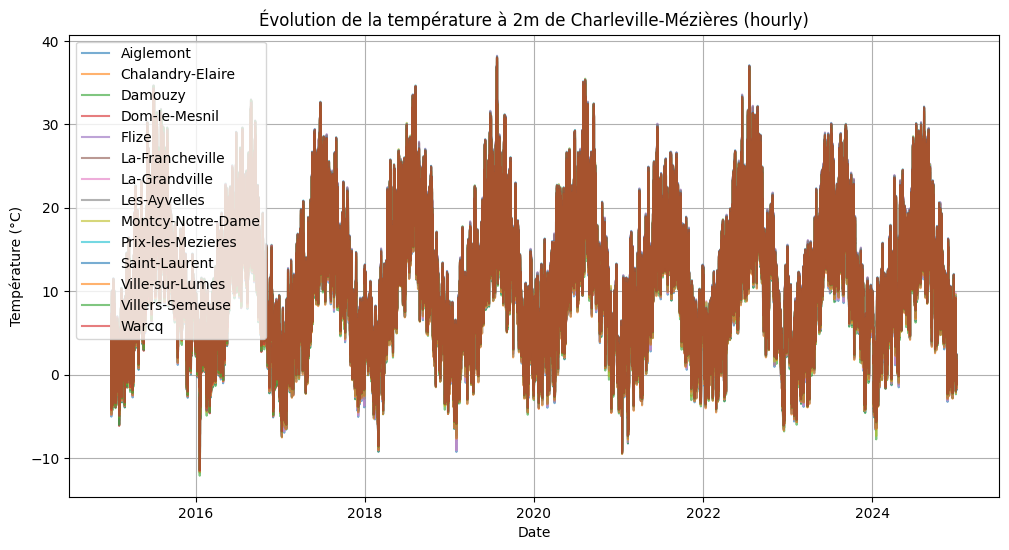

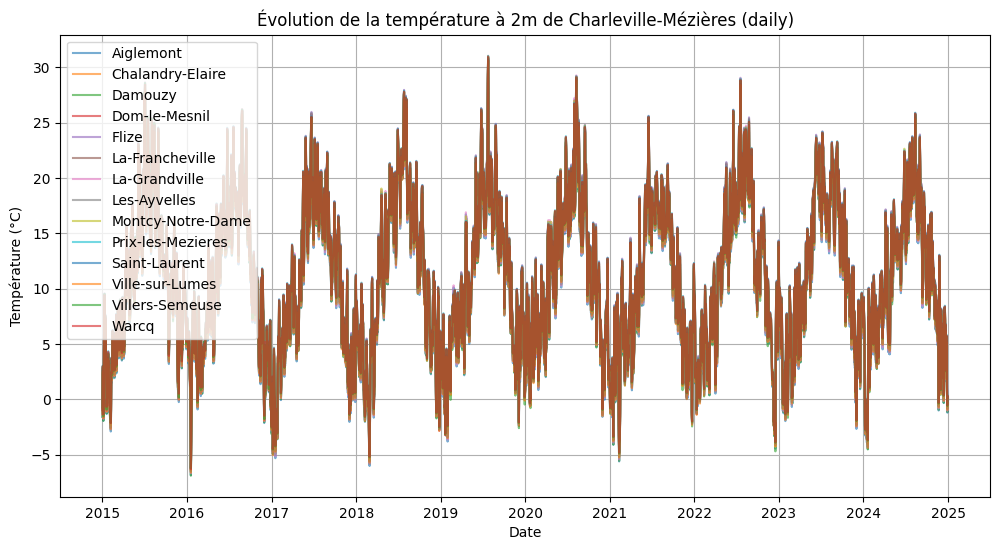

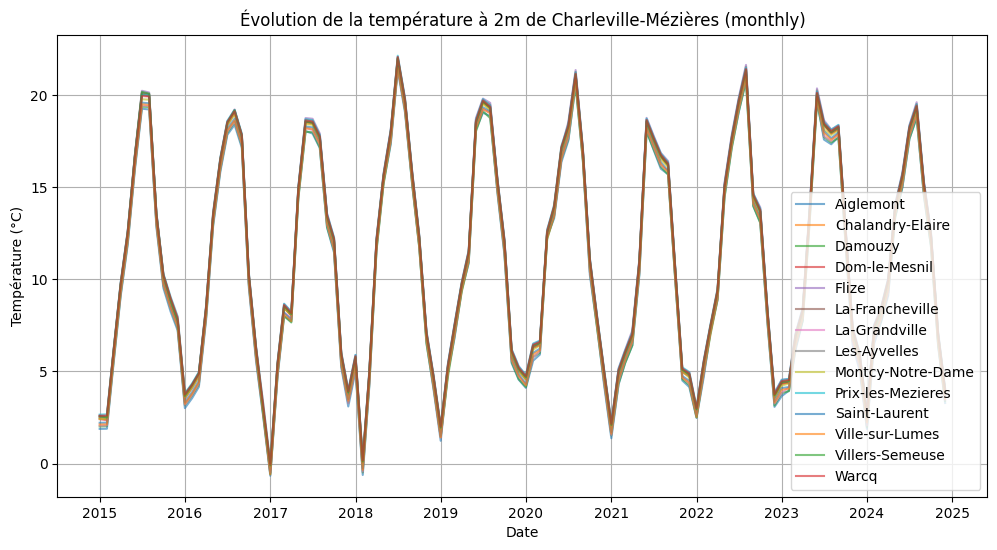

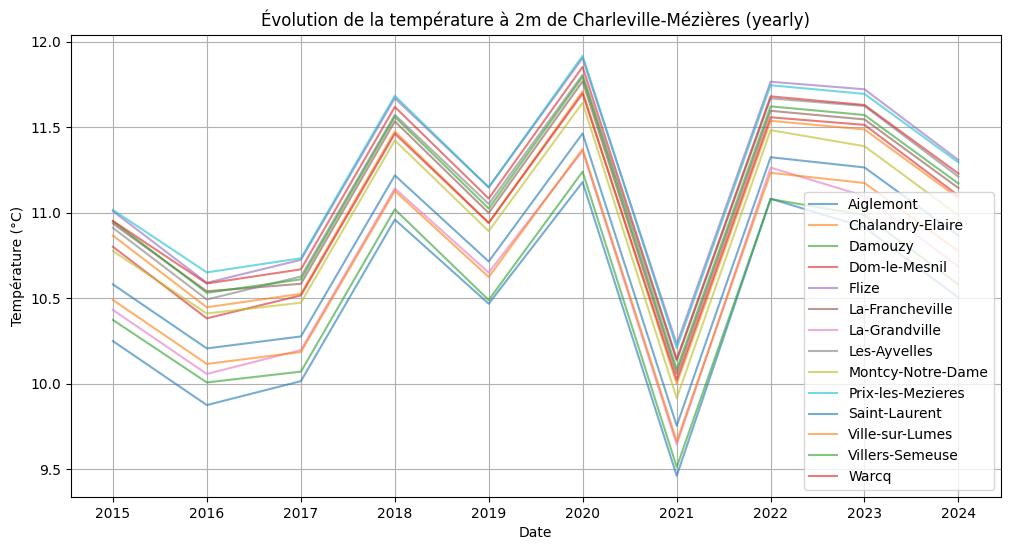

In [7]:
colors = sns.color_palette("tab10", n_colors=len(Nearby_cities_C))
frequences = {'hourly' : Dataframes_C, 'daily' : Dataframes_C_daily, 'monthly' : Dataframes_C_monthly, 'yearly' : Dataframes_C_yearly}

for freq, dfs in frequences.items():

    plt.figure(figsize=(12, 6))

    for city, df in dfs.items():
        plt.plot(
            df['date'], 
            df['temperature_2m'], 
            label=city, 
            color=colors[Nearby_cities_C.index(city)], 
            alpha=0.6,
            linewidth=1.5
        )    
        
    plt.title(f'Évolution de la température à 2m de Charleville-Mézières ({freq})')
    plt.xlabel('Date')
    plt.ylabel('Température (°C)')
    plt.legend()
    plt.grid()
    plt.show()

Pour une fréquence d'affichage de points hourly et daily on n'arrive pas à discerner grand chose, hormis la saisonnalité des températures. Cela est dû à la longueur de notre interval temporel (10 ans). 
En revanche, il est plus intéressant de regarder qu'il y a une différence plus flagrante pour les moyennes de températures annuelles. Ce qui est surprenant c'est que les courbes ne se croisent presque jamais.

En faisant le lien avec le graphique précédent sur la géographie relative des villes, on voit apparaître une corrélation géographie et températures moyennes. Cependant, elle est contrintuive car ce ne sont pas les villes les plus au sud qui sont les plus chaudes. Mais ce sont les villes les plus proches de Charleville-Mézières sont globalement plus chaudes. Ceci peut être expliqué car elles sont plus urbanisées et donc retiennent davatange la chaleur. 

#### Pluie/Précipitation

On trace la pluie des villes en fonction du temps en changeant l'intervalle de temps entre les mesures pour ne pas être trop submergé d'info et ne plus rien comprendre aux plots. 

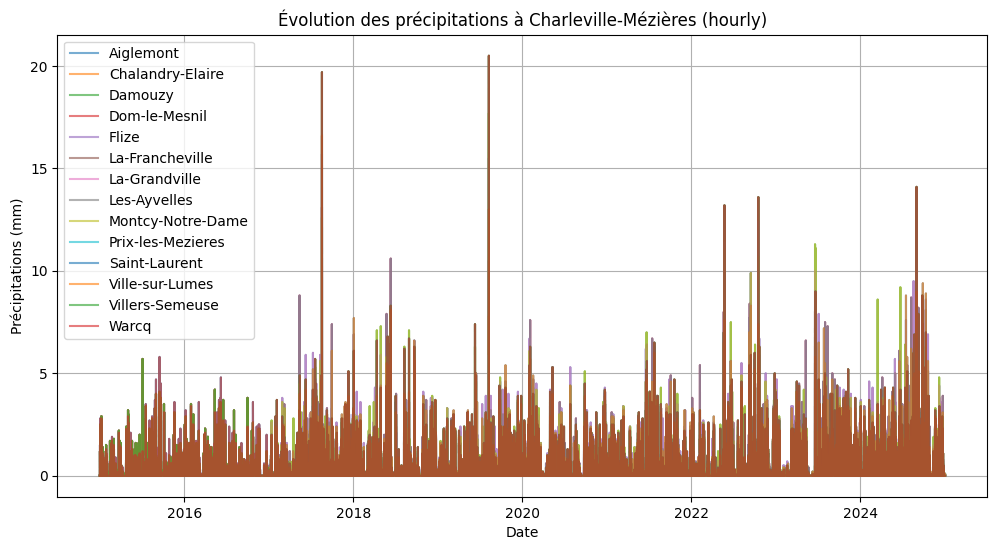

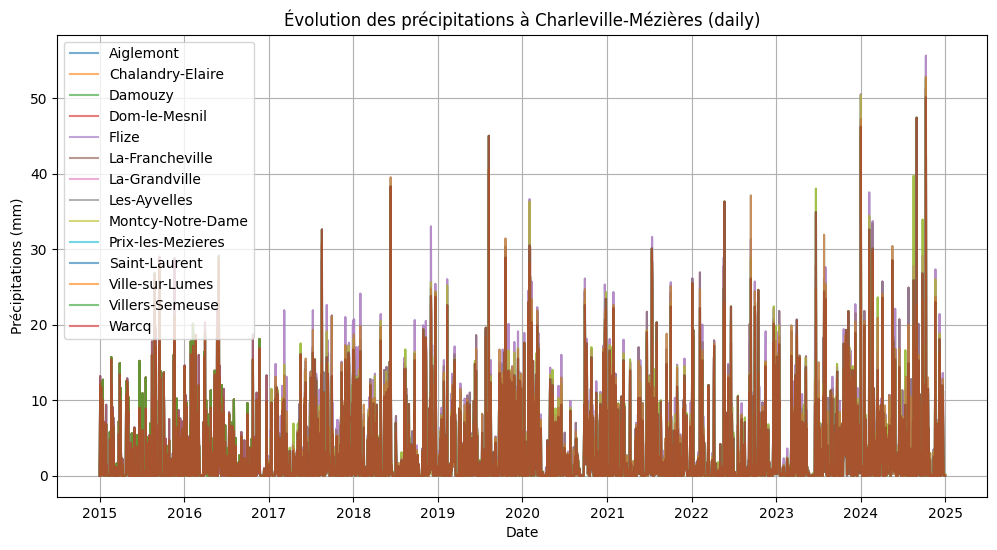

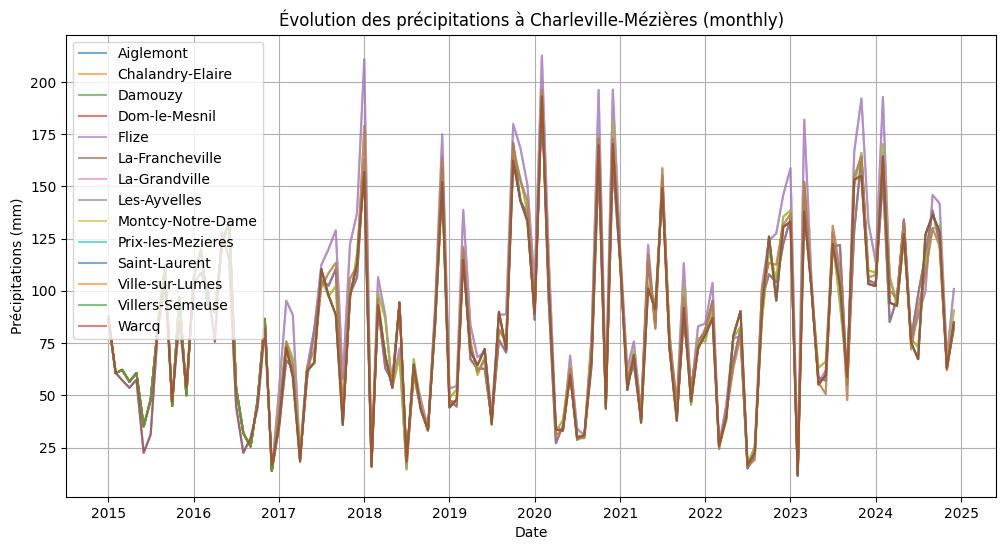

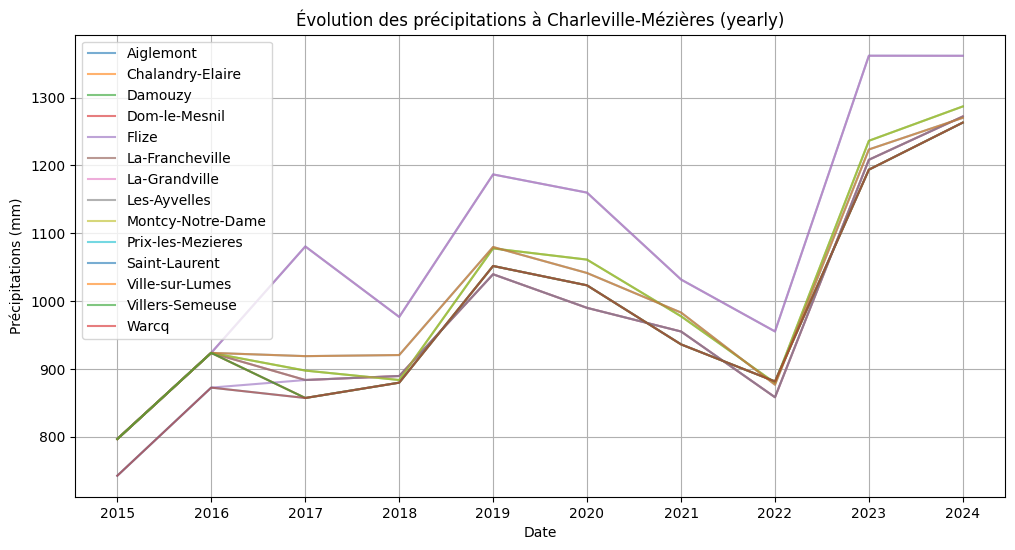

In [9]:
colors = sns.color_palette("tab10", n_colors=len(Nearby_cities_C))
frequences = {'hourly' : Dataframes_C, 'daily' : Dataframes_C_daily, 'monthly' : Dataframes_C_monthly, 'yearly' : Dataframes_C_yearly}

for freq, dfs in frequences.items():

    plt.figure(figsize=(12, 6))

    for city, df in dfs.items():
        plt.plot(
            df['date'], 
            df['rain'], 
            label=city, 
            color=colors[Nearby_cities_C.index(city)], 
            alpha=0.6,
            linewidth=1.5
        )    
        
    plt.title(f'Évolution des précipitations à Charleville-Mézières ({freq})')
    plt.xlabel('Date')
    plt.ylabel('Précipitations (mm)')
    plt.legend()
    plt.grid()
    plt.show()

A partir des graphiques ci-dessus, il est difficile d'établir une quelconque saisonnalité sur ces données de précipitations. Cependant, il est quand même intéressant de remarquer que Flize est une ville qu'on peut un peu considérer comme un outlier car ses cumuls sont bien au dessus des autres communes qui suivent à peu de choses près la même trajectoire. Et par ailleurs, on remarque qu'il y a de plus en plus de précipitations annuellement (d'environ 800 mm en 2015 à plus de 1200 mm en 2024). La station d'épuration doit donc gérer un flux de plus en plus important. 

On décide de diminuer l'intervalle de temps de manière totalement arbitraire pour mettre plus en valeur les données par heure et par jour. 

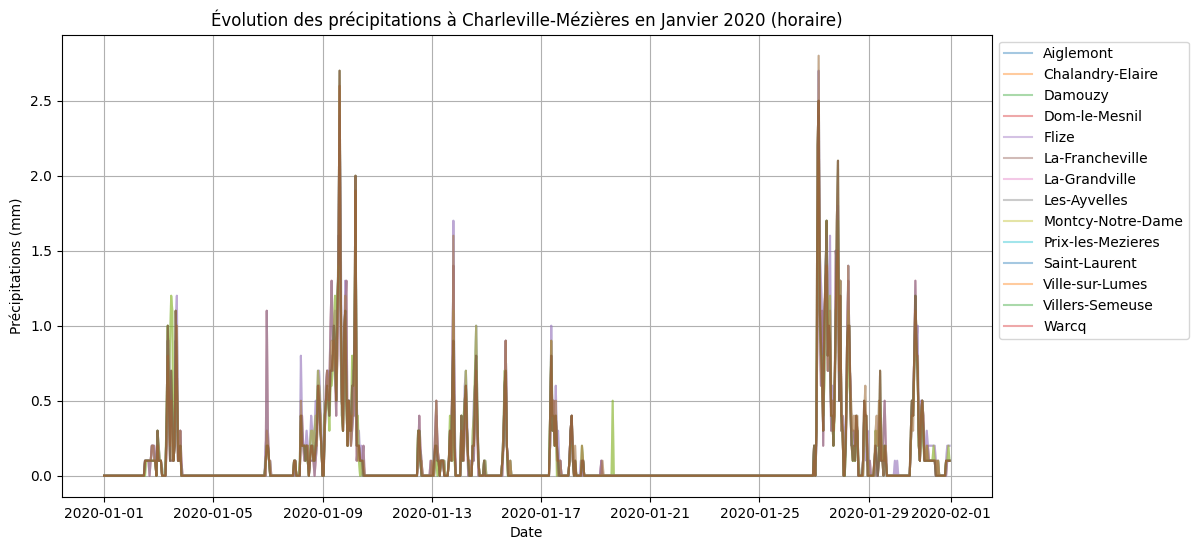

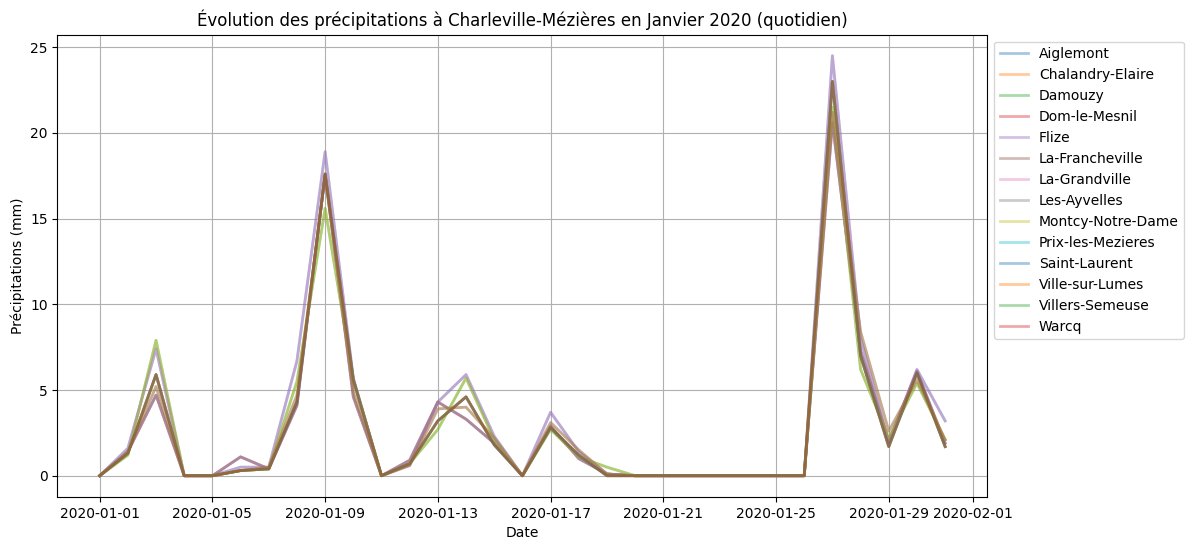

In [18]:
colors = sns.color_palette("tab10", n_colors=len(Nearby_cities_C))

df_Jan_2020 = {city: df[(df['date'].dt.year == 2020) & (df['date'].dt.month == 1)] for city, df in Dataframes_C.items()}

plt.figure(figsize=(12, 6))
for city, df in df_Jan_2020.items():
    plt.plot(
        df['date'],
        df['rain'],
        label=city,
        color=colors[Nearby_cities_C.index(city)],
        alpha=0.4,
        linewidth=1.5
    )
plt.title(f'Évolution des précipitations à Charleville-Mézières en Janvier 2020 (horaire)')
plt.xlabel('Date')
plt.ylabel('Précipitations (mm)')
plt.legend(bbox_to_anchor=(1, 1))
plt.grid()
plt.show()

df_Jan_2020_daily = {city: df[(df['date'].dt.year == 2020) & (df['date'].dt.month == 1)] for city, df in Dataframes_C_daily.items()}

plt.figure(figsize=(12, 6))
for city, df in df_Jan_2020_daily.items():
    plt.plot(
        df['date'],
        df['rain'],
        label=city,
        color=colors[Nearby_cities_C.index(city)],
        alpha=0.4,
        linewidth=2
    )
plt.title(f'Évolution des précipitations à Charleville-Mézières en Janvier 2020 (quotidien)')
plt.xlabel('Date')
plt.ylabel('Précipitations (mm)')
plt.legend(bbox_to_anchor=(1, 1))
plt.grid()
plt.show()

On remarque que comme les communes sont très proches alors elles appartiennent à peu près à la même zone de précipitation.

On va le vérifier en plottant la matrice de corrélation. 

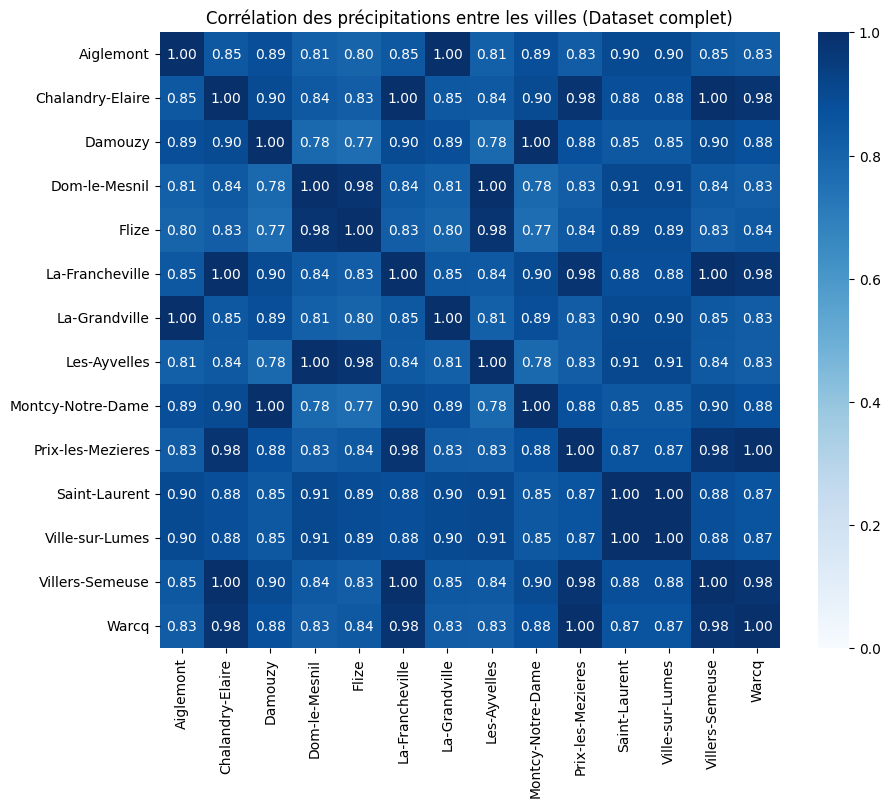

In [34]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df_rain_all = pd.DataFrame()

for city, df in Dataframes_C.items():
    temp_df = df.copy()
    temp_df['date'] = pd.to_datetime(temp_df['date'])
    temp_df = temp_df.set_index('date')
    df_rain_all[city] = temp_df['rain']

corr_matrix = df_rain_all.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, 
            annot=True, 
            cmap='Blues', 
            vmin=0, vmax=1, 
            fmt=".2f")

plt.title("Corrélation des précipitations entre les villes (Dataset complet)")
plt.show()

Hormis pour la ville de Flize, on voit bien que la corrélation des précipitations pour chaque ville est très importante (>0.8). On peut donc faire l'hypothèse qu'on peut uniquement considérer la moyenne des précipations pour représenter l'intégralité des précipitations de toutes les communes. 

#### Vent

On veut découvrir les patterns sous-jacents aux données relatives au vent s'il y en a. 

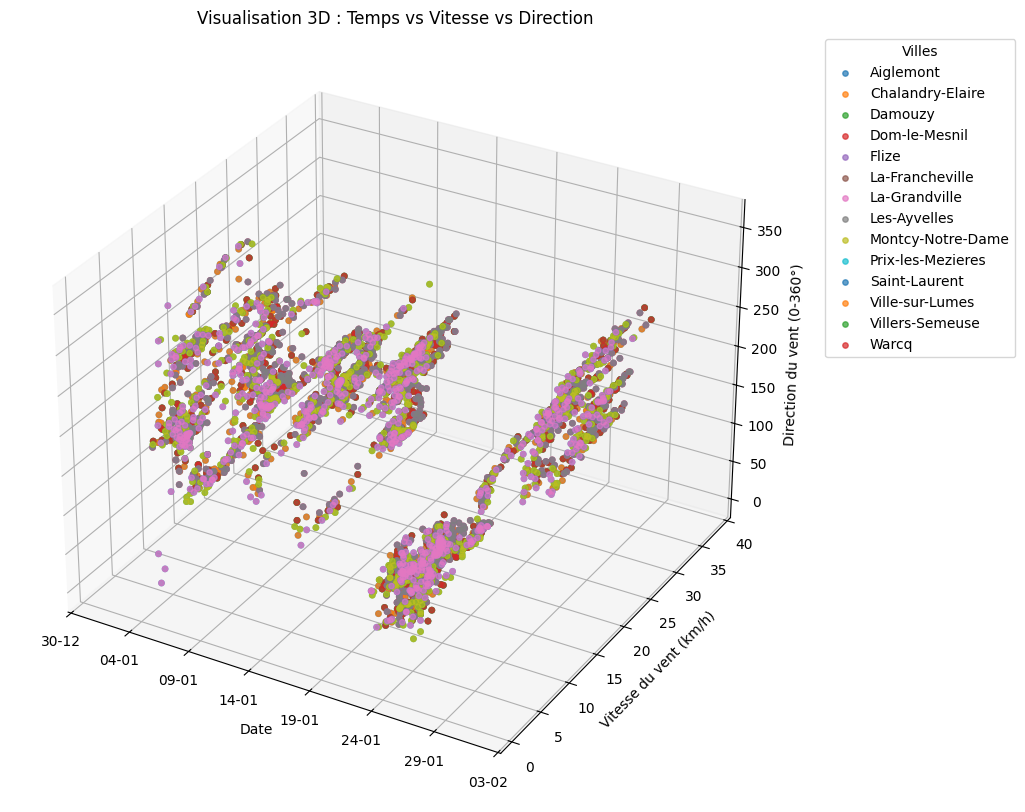

In [35]:
fig = plt.figure(figsize=(15, 10))
ax = fig.add_subplot(111, projection='3d')

for city, df in df_Jan_2020.items():
    dates_num = mdates.date2num(df['date'])
    
    ax.scatter(dates_num, 
               df['wind_speed_10m'], 
               df['wind_direction_10m'], 
               label=city, 
               s=15, alpha=0.7)

ax.set_xlabel('Date')
ax.set_ylabel('Vitesse du vent (km/h)')
ax.set_zlabel('Direction du vent (0-360°)')

ax.xaxis.set_major_formatter(mdates.DateFormatter('%d-%m'))

plt.title("Visualisation 3D : Temps vs Vitesse vs Direction")
plt.legend(title="Villes", bbox_to_anchor=(1.05, 1))
plt.show()

Les points pour chaque ville étant assez resséré. On peut sans nul doute faire la même hypothèse qu'avec la pluie. Pour vérifier si cette hypothèse est valable, on trace la matrice de corrélation. 

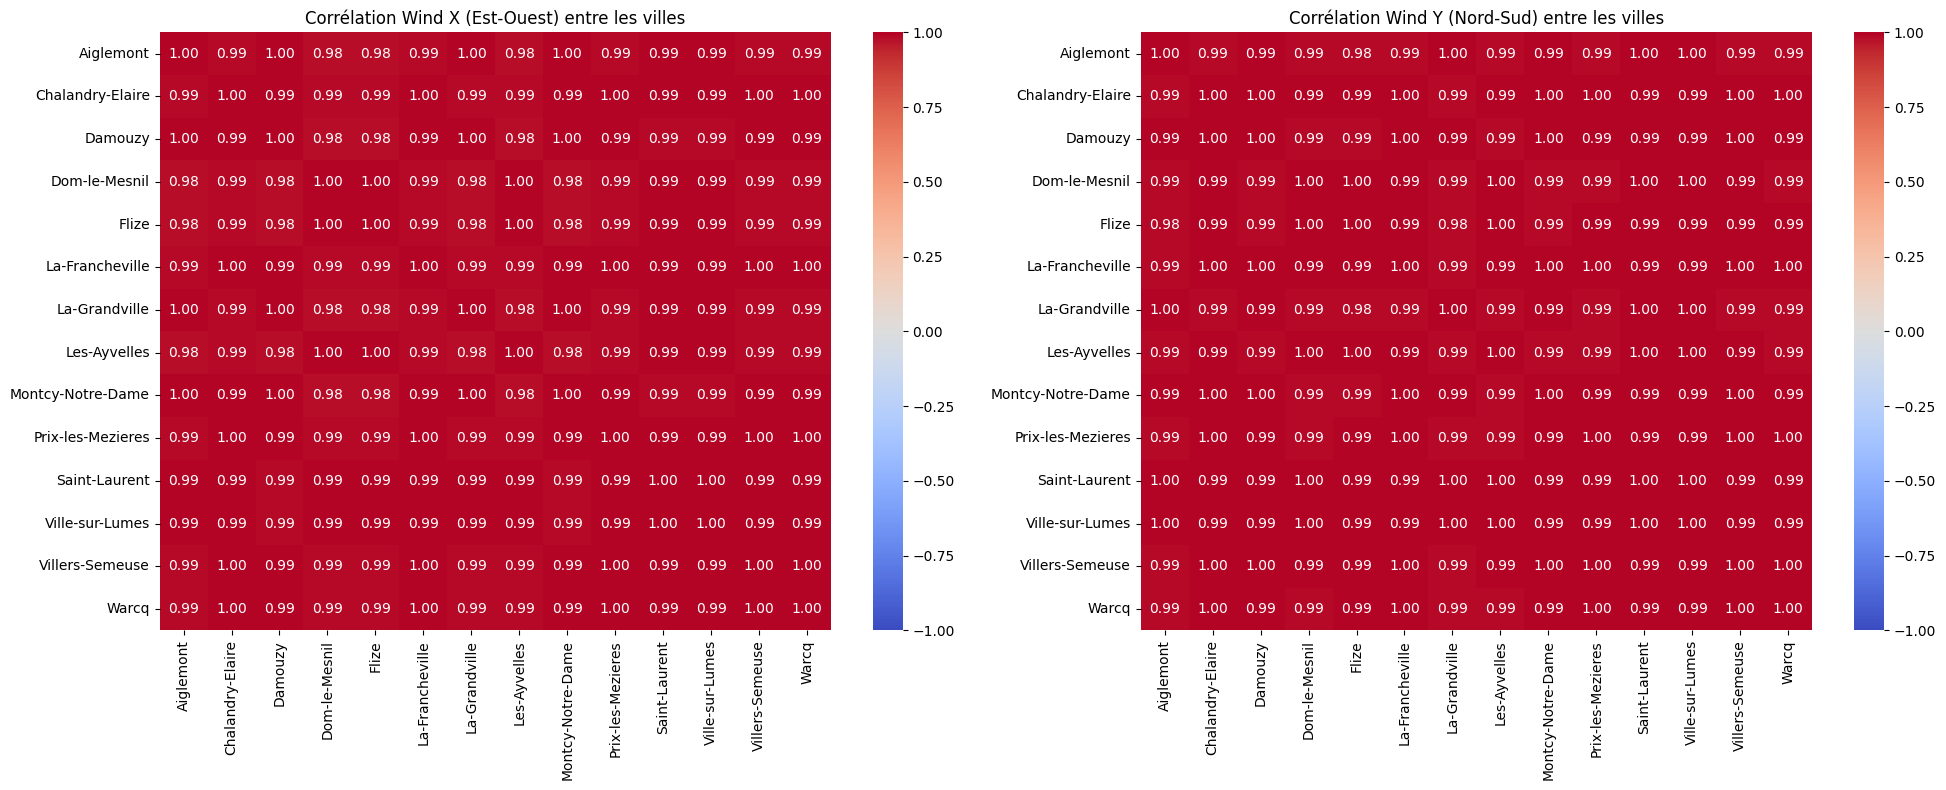

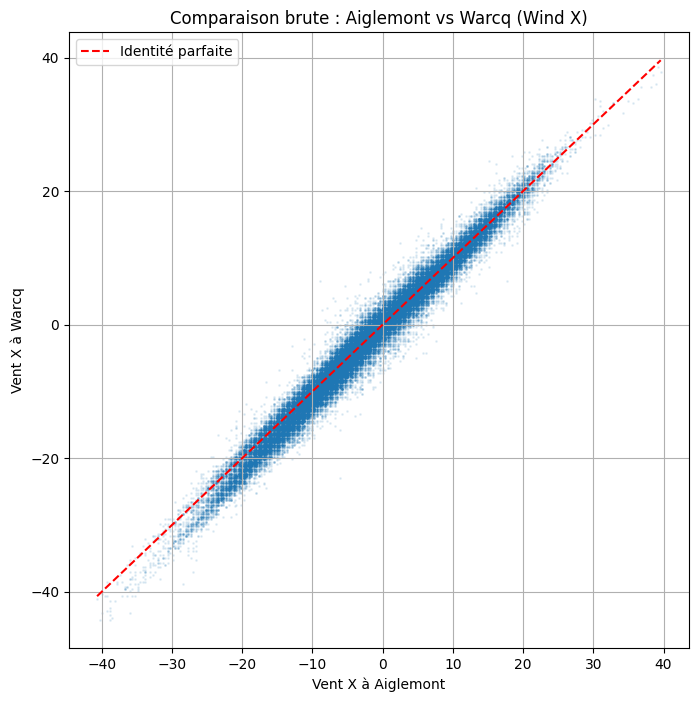

Écart-type des différences locales (km/h) :
Flize                1.184735
Dom-le-Mesnil        1.075580
Les-Ayvelles         1.075580
Aiglemont            1.047568
La-Grandville        1.047568
Damouzy              1.002962
Montcy-Notre-Dame    1.002962
Saint-Laurent        0.751500
Ville-sur-Lumes      0.751500
Prix-les-Mezieres    0.737642
Warcq                0.737642
Chalandry-Elaire     0.581529
La-Francheville      0.581529
Villers-Semeuse      0.581529
dtype: float64


In [38]:
df_wind_x_all = pd.DataFrame()
df_wind_y_all = pd.DataFrame()

for city, df in Dataframes_C.items():
    wind_rad = np.deg2rad(df['wind_direction_10m'])
    df['wind_x'] = df['wind_speed_10m'] * np.cos(wind_rad)
    df['wind_y'] = df['wind_speed_10m'] * np.sin(wind_rad)

    temp_df = df.copy()
    temp_df['date'] = pd.to_datetime(temp_df['date'])
    temp_df = temp_df.set_index('date')
    
    df_wind_x_all[city] = temp_df['wind_x']
    df_wind_y_all[city] = temp_df['wind_y']

corr_matrix_x = df_wind_x_all.corr()
corr_matrix_y = df_wind_y_all.corr()

fig, axes = plt.subplots(1, 2, figsize=(20, 8))

sns.heatmap(corr_matrix_x, ax=axes[0], annot=True, cmap='coolwarm', vmin=-1, vmax=1, fmt=".2f")
axes[0].set_title('Corrélation Wind X (Est-Ouest) entre les villes')

sns.heatmap(corr_matrix_y, ax=axes[1], annot=True, cmap='coolwarm', vmin=-1, vmax=1, fmt=".2f")
axes[1].set_title('Corrélation Wind Y (Nord-Sud) entre les villes')

plt.tight_layout()
plt.show()

plt.figure(figsize=(8, 8))
ville_A = 'Aiglemont' # Choisis deux villes de ta liste
ville_B = 'Warcq'

plt.scatter(df_wind_x_all[ville_A], df_wind_x_all[ville_B], alpha=0.1, s=1)
plt.plot([df_wind_x_all[ville_A].min(), df_wind_x_all[ville_A].max()], 
         [df_wind_x_all[ville_A].min(), df_wind_x_all[ville_A].max()], 
         'r--', label='Identité parfaite')
plt.title(f"Comparaison brute : {ville_A} vs {ville_B} (Wind X)")
plt.xlabel(f"Vent X à {ville_A}")
plt.ylabel(f"Vent X à {ville_B}")
plt.legend()
plt.grid(True)
plt.show()

mean_wind_x = df_wind_x_all.mean(axis=1)

df_residuals = df_wind_x_all.sub(mean_wind_x, axis=0)

print("Écart-type des différences locales (km/h) :")
print(df_residuals.std().sort_values(ascending=False))

## Station P

Cette section touche à toutes les données de la station P.